In [13]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from scipy.special import sph_harm

In [ ]:
def plot_harmonic(ax, l, m):
    """Plot the spherical harmonic Y(l, m) on a given axis."""
    N = 50 # resolution
    theta = np.linspace(0, np.pi, N)
    phi = np.linspace(0, 2 * np.pi, N)
    theta, phi = np.meshgrid(theta, phi)
    
    Y_lm = sph_harm(m, l, phi, theta).real
    
    Ymax, Ymin = Y_lm.max(), Y_lm.min()
    if Ymax != Ymin:
        Y_lm = 2 * (Y_lm - Ymin) / (Ymax - Ymin) - 1
        radii = np.abs(Y_lm)
        Ycolors = 0.5 * (Y_lm + 1)
    else:
        radii = np.ones(Y_lm.shape)
        Ycolors = np.ones(Y_lm.shape)

    # Convert spherical to Cartesian coordinates
    x = radii * np.sin(theta) * np.cos(phi)
    y = radii * np.sin(theta) * np.sin(phi)
    z = radii * np.cos(theta)

    # Plot the surface with color mapping
    ax.plot_surface(x, y, z, rstride=1, cstride=1, lw=0, facecolors=cm.coolwarm(Ycolors), edgecolor='none')
    ax.set_title(f'Y({l},{m})', y=1.1, pad = -40)
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)

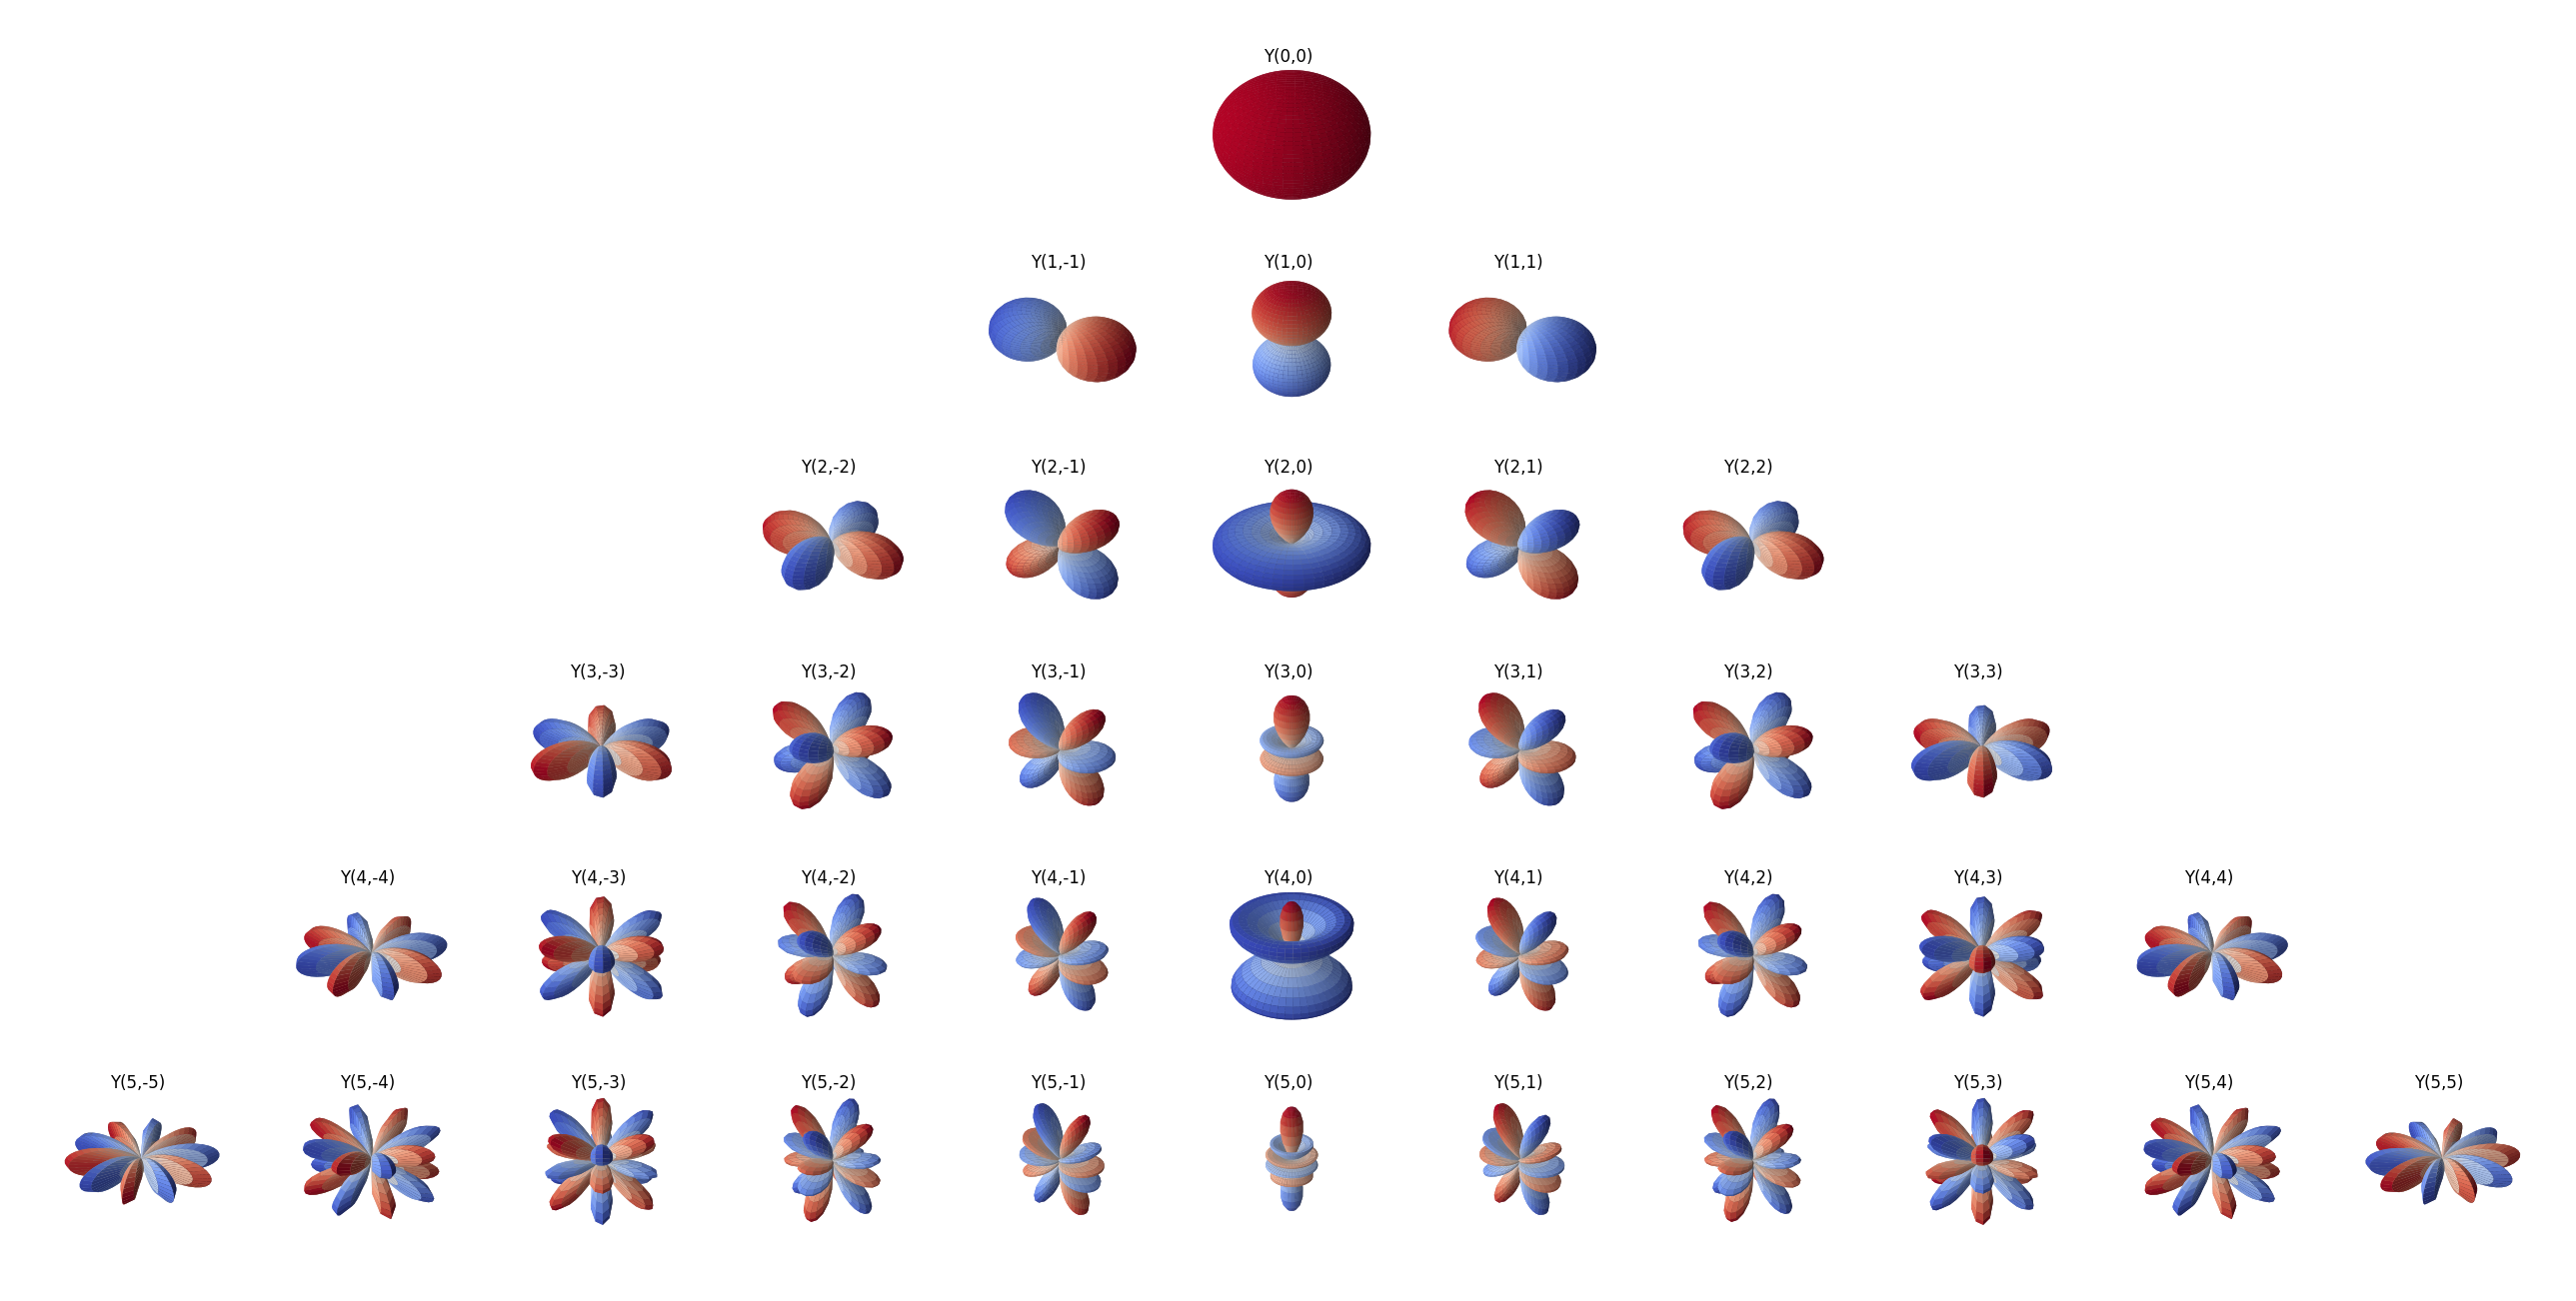

In [100]:
def plot_up_to(n):
    """Plot all spherical harmonics up to a maximum l value of n."""
    fig, axes = plt.subplots(n + 1, 2 * n + 1, subplot_kw={'projection': '3d'}, figsize=(3*(2*n+1), 4*(n+1)))

    for ax_row in axes:
        for ax in ax_row:
            ax.axis('off')
    
    for l in range(n + 1):
        for m in range(-l, l + 1):
            ax = axes[l, m + n]  # Position in grid (centered for each m)
            plot_single_harmonic(ax, l, m)
    plt.subplots_adjust(wspace=-0.1, hspace=-0.75)
    plt.show()

# Example usage
plot_up_to(5)